In [11]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA, SparsePCA, KernelPCA, NMF
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
import tensorflow as tf
from sklearn_wrappers import spca_exp_faces, kernel_exp, autoencoder_exp, nmf_exp_faces
import kernel_pca as kpca

In [12]:
# Takes 6 minutes to load the data if this is your first time
lfw_people = fetch_lfw_people(min_faces_per_person=100)
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
print(f'No. of features in face dataset: {n_features}')

No. of features in face dataset: 2914


In [13]:
def plot_gallery(images, titles, k, h, w):
    """Helper function to plot a gallery of portraits"""
    n_col = 5
    if k <= n_col:
        n_row = 1
    else:
        n_row = k // 5 + 1
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        if i == k:
            break
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [14]:
def run_test_sweep(X_train, X_test, is_faces, dataset_name, num_dataset_dims=None):
    if is_faces:
        k_list = [1,5,9]
        for k in k_list:
            print("Number of components: k =",k)
            
            # SPCA
            if k < 5:
                best_spca_alpha, best_spca_alpha_err, best_eigenfaces_spca = spca_exp_faces(X_train,X_test,k,h,w)
            
            # KPCA
            best_kernel, best_kernel_err = kernel_exp(X_train,X_test,k)

            # Our own KPCA implementation
            X_recon_kernel_pca, X_recon_kernel_pca_err = kpca.kernel_PCA(X_train, X_test, n_components=k, kernel='rbf', gamma=0.0433, mode='recon', alpha=1.0)
            
            # Autoencoder
            _, best_autoencoder_err = autoencoder_exp(X_train, X_test, k)
            
            # NMF
            nmf_err_train, nmf_err_test, eigenfaces_nmf = nmf_exp_faces(X_train,X_test,k,h,w)
            
            # ==> Summary
            print("- MSE loss summary: ",dataset_name,"is_faces =",is_faces,"k =",k)
            if k < 5:
                print("-- Sparse PCA (alpha=",best_spca_alpha,"): err=",best_spca_alpha_err)
            print("-- Kernel PCA(",best_kernel,"): err=",best_kernel_err)
            print(f"-- Own Kernel PCA implementation: err={X_recon_kernel_pca_err}")
            print("-- Autoencoder: err=",best_autoencoder_err)
            print("-- NMF: err=",nmf_err_test)

            if k < 5:
                eigenface_titles_spca = [f"SPCA eigenface {i}" for i in range(best_eigenfaces_spca.shape[0])]
                plot_gallery(best_eigenfaces_spca, eigenface_titles_spca, k, h, w)
                plt.show()

            eigenface_titles_nmf = [f"NMF eigenface {i}" for i in range(eigenfaces_nmf.shape[0])]
            plot_gallery(eigenfaces_nmf, eigenface_titles_nmf, k, h, w)
            plt.show()

    else:
        for k in range(1,num_dataset_dims):
            print("Number of components: k =",k)
            
            # SPCA
            best_spca_alpha, best_spca_alpha_err = spca_exp(X_train,X_test,k)
            
            # KPCA
            best_kernel, best_kernel_err = kernel_exp(X_train,X_test,k)

            # Our own KPCA implementation
            X_recon_kernel_pca, X_recon_kernel_pca_err = kpca.kernel_PCA(X_train, X_test, n_components=k, kernel='rbf', gamma=0.0433, mode='recon', alpha=1.0)
            
            # Autoencoder
            _, best_autoencoder_err = autoencoder_exp(X_train, X_test, k)
            
            # NMF
            _, best_nmf_err = nmf_exp(X_train,X_test,k)
            
            # ==> Summary
            print("- MSE loss summary: ",dataset_name,"is_faces =",is_faces,"k =",k)
            print("-- Sparse PCA (alpha=",best_spca_alpha,"): err=",best_spca_alpha_err)
            print("-- Kernel PCA(",best_kernel,"): err=",best_kernel_err)
            print(f"-- Own Kernel PCA implementation: err={X_recon_kernel_pca_err}")
            print("-- Autoencoder: err=",best_autoencoder_err)
            print("-- NMF: err=",best_nmf_err)

Number of components: k = 5
Kernel PCA ( Linear kernel ) MSE reconstruction loss: 0.011275962
- New best kernel
Kernel PCA ( RBF kernel, $\gamma=0.04$ ) MSE reconstruction loss: 0.022161918
Kernel PCA ( Sigmoid kernel, $\gamma=10^{-3}, r=1$ ) MSE reconstruction loss: 0.020868525


Best MSE reconstruction error: 0.011275962
- Kernel: Linear kernel


 Own rbf kpca implementation
rbf kernel, mse err = 0.0204954779376227
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2914)]            0         
                                                                 
 encoding (Dense)            (None, 5)                 14575     
                                                                 
 decoding (Dense)            (None, 2914)              17484     
                                                                 
Total params: 32,059
Trainable par

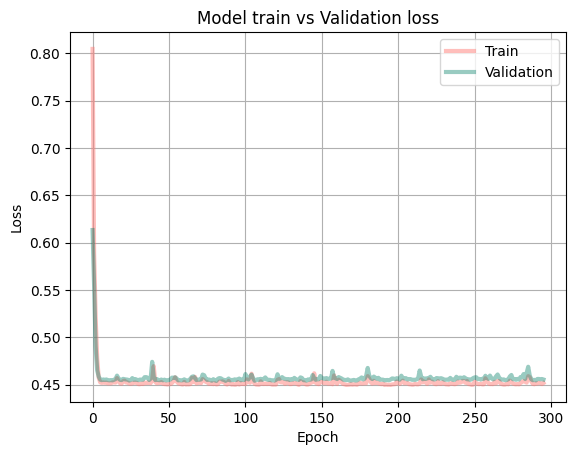

Training loss: 0.45175832509994507
Validation loss: 0.4554402530193329
MSE on training data: 0.011157367811283788
MSE on test data: 0.011352656145261196


Best NMF:


c:\Users\Jasmine\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Basis vectors:
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.31471956 0.2845772  0.28679955 ... 0.         0.         0.        ]
 [0.30034304 0.32528046 0.35829875 ... 0.         0.         0.        ]
 [0.11176925 0.12040006 0.13375467 ... 0.9397159  0.8963477  0.83484656]
 [0.40761188 0.39260983 0.4154481  ... 0.32760578 0.28503513 0.25458497]]
Coefficients:
 [[0.41668913 0.5541384  0.41445887 0.27667272 0.38718042]
 [0.17493908 0.14615658 0.29408258 0.6959736  0.47885203]
 [0.6882889  0.3324628  0.13118249 0.45067233 0.43988517]
 ...
 [0.6432133  0.33042762 0.11872061 0.401887   0.3626187 ]
 [0.67934537 0.         0.22910585 0.4979017  0.37634382]
 [0.4188853  0.32134035 0.07764356 0.39915213 0.4171189 ]]


Best MSE reconstruction error on train data: 0.010946747
Best MSE reconstruction error on test data: 0.011040918
- MSE loss summary:  faces is_faces = True k = 5
-- Kernel PCA( Linear kernel ): err= 0.011275962
-- Own Kernel PCA implementation: er

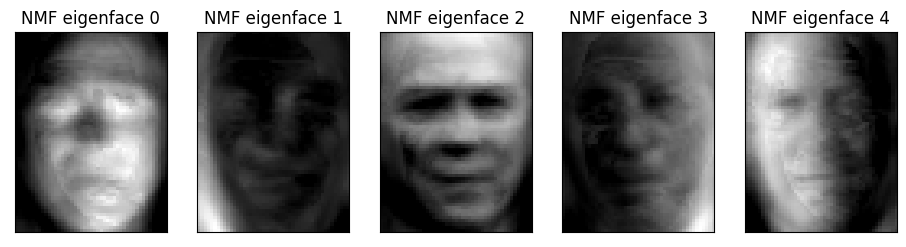

Number of components: k = 9
Kernel PCA ( Linear kernel ) MSE reconstruction loss: 0.009389522
- New best kernel
Kernel PCA ( RBF kernel, $\gamma=0.04$ ) MSE reconstruction loss: 0.022161977
Kernel PCA ( Sigmoid kernel, $\gamma=10^{-3}, r=1$ ) MSE reconstruction loss: 0.020837711


Best MSE reconstruction error: 0.009389522
- Kernel: Linear kernel


 Own rbf kpca implementation
rbf kernel, mse err = 0.020175981728046136
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2914)]            0         
                                                                 
 encoding (Dense)            (None, 9)                 26235     
                                                                 
 decoding (Dense)            (None, 2914)              29140     
                                                                 
Total params: 55,375
Trainable p

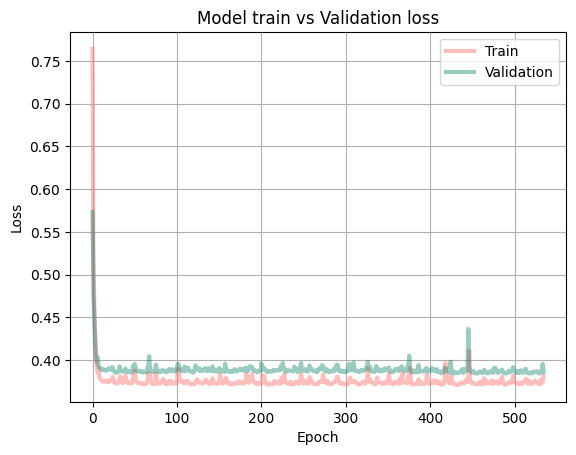

Training loss: 0.38142362236976624
Validation loss: 0.3863619565963745
MSE on training data: 0.00924459578997671
MSE on test data: 0.00950915135929019


Best NMF:


c:\Users\Jasmine\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Basis vectors:
 [[0.0199266  0.01472784 0.00183308 ... 0.40707055 0.444249   0.44952175]
 [0.16936556 0.15054017 0.1476884  ... 0.         0.         0.        ]
 [0.13124336 0.14768828 0.18499564 ... 0.         0.         0.        ]
 ...
 [0.34471595 0.3744477  0.42162958 ... 0.0753148  0.05099247 0.0196565 ]
 [0.         0.         0.         ... 1.5889572  1.3812485  1.1417191 ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
Coefficients:
 [[0.         0.5242716  0.11403418 ... 0.3222521  0.20041132 0.32444412]
 [0.6130177  0.16421856 0.2917171  ... 0.42314458 0.38023305 0.13591458]
 [0.3186557  0.30233365 0.29462165 ... 0.15488872 0.27138773 0.40124035]
 ...
 [0.12103252 0.33415228 0.53617525 ... 0.18769372 0.23009226 0.32743642]
 [0.33062327 0.         0.4206104  ... 0.30875996 0.24509105 0.37109724]
 [0.5908311  0.26537445 0.36458263 ... 0.07192632 0.15995273 0.14325002]]


Best MSE reconstruction error on train data: 0.009036795
Best MSE reconstructio

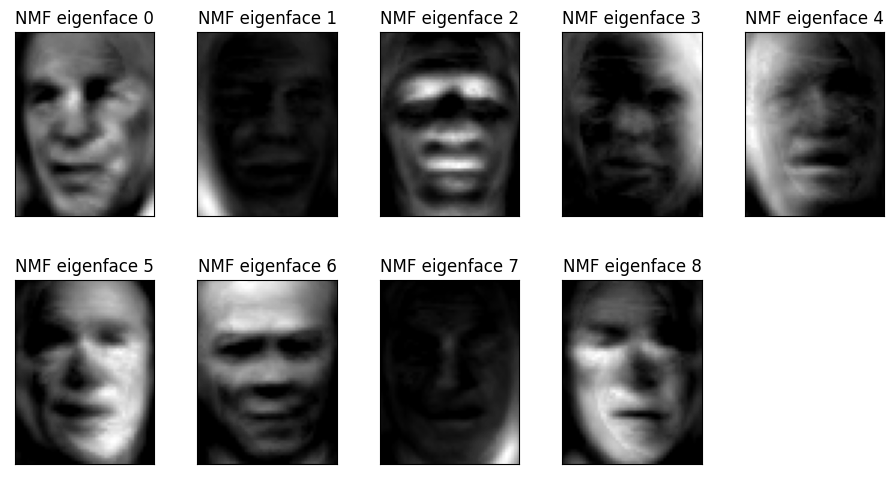

In [15]:
run_test_sweep(X_train, X_test, is_faces=True, dataset_name='faces')